<a href="https://colab.research.google.com/github/Joe270585/Recomendacao_Por_Imagens/blob/main/Recomendacao_por_Imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Passos para fazer upload das imagens:**

1. Clique no ícone de pasta no painel esquerdo para abrir o explorador de arquivos.
2. Clique nos três pontos ao lado do ícone de pasta raiz (`/content`).
3. Selecione "Nova pasta" e nomeie-a como `images`.
4. Clique na pasta `images` recém-criada.
5. Clique no ícone de upload (uma seta apontando para cima) e selecione suas imagens para fazer upload para este diretório.

Após o upload, execute a célula de código.

In [15]:
# Importando bibliotecas

import os
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


# Carregando Modelo pré-treinado ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

dataset_path = "images"
embeddings = []
filenames = []

print("🔹 Computando embeddings das imagens...")

for fname in os.listdir(dataset_path):
    if fname.lower().endswith((".jpg", ".png", ".jpeg")):
        img_path = os.path.join(dataset_path, fname)
        img = image.load_img(img_path, target_size=(224,224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        vec = model.predict(x)
        embeddings.append(vec.flatten())
        filenames.append(fname)
        print("Processado:", fname)

embeddings = np.array(embeddings)
np.save("embeddings.npy", embeddings)
np.save("filenames.npy", filenames)
print("✅ Embeddings computados e salvos.")


🔹 Computando embeddings das imagens...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Processado: 1.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Processado: 11.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Processado: 9.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Processado: 12.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Processado: 8.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Processado: 2.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Processado: 5.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Processado: 4.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Processado: 10.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Processado: 3.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
Processado: 7.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
Processado: 6.jpeg
✅ Embeddings computados e salvos.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


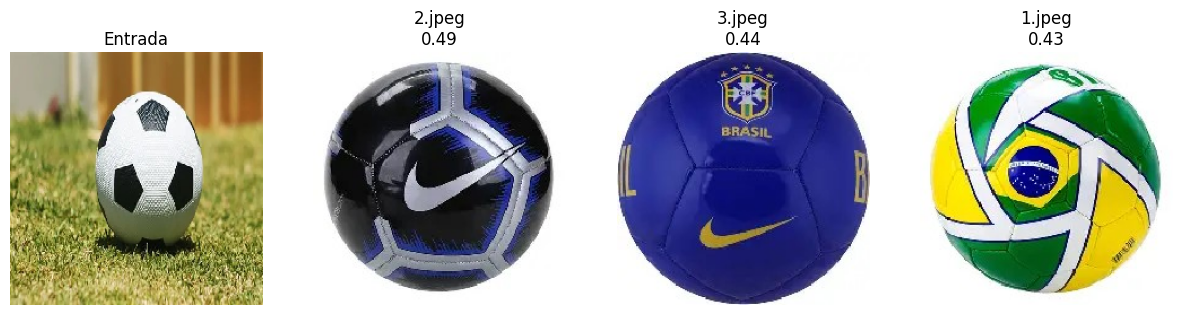

In [24]:
# Carregar embeddings existentes
try:
    embeddings = np.load("embeddings.npy")
    filenames = np.load("filenames.npy")
except FileNotFoundError:
    print("Erro: Arquivos de embeddings (embeddings.npy ou filenames.npy) não encontrados.")
    print("Por favor, execute a célula de geração de embeddings primeiro.")
    embeddings = np.array([]) # Definindo as incorporações como um array vazio para evitar erros adicionais.
    filenames = np.array([]) # Definindo nomes de ficheiros como um array vazio


if embeddings.size == 0:
    print("Nenhum embedding carregado. Certifique-se de que há imagens no diretório 'images' e que a célula de geração de embeddings foi executada com sucesso.")
else:
    # Modelo pré-treinado para a nova imagem
    base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
    model = Model(inputs=base_model.input, outputs=base_model.output)

    def get_embedding(img_path):
        img = image.load_img(img_path, target_size=(224,224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        vec = model.predict(x)
        return vec.flatten()

    def recommend(new_image_path, top_n=5):
        new_vec = get_embedding(new_image_path)
        sims = cosine_similarity([new_vec], embeddings)[0]
        top_indices = sims.argsort()[-top_n:][::-1]
        return [(filenames[i], sims[i]) for i in top_indices]

    def show_recommendations(new_image_path, top_n=5):
        recs = recommend(new_image_path, top_n)

        plt.figure(figsize=(15,5))
        # Mostrar imagem de entrada
        plt.subplot(1, top_n+1, 1)
        img_in = image.load_img(new_image_path, target_size=(224,224))
        plt.imshow(img_in)
        plt.title("Entrada")
        plt.axis("off")

        # Mostrar imagens recomendadas
        for i, (fname, score) in enumerate(recs):
            plt.subplot(1, top_n+1, i+2)
            img = image.load_img(os.path.join(dataset_path, fname), target_size=(224,224))
            plt.imshow(img)
            plt.title(f"{fname}\n{score:.2f}")
            plt.axis("off")
        plt.show()

    # Exemplo de uso:
    # Substitua "nova_imagem.jpg" pelo caminho da sua imagem de teste
    show_recommendations("/content/OIP (1).jpeg", top_n=3)